In [58]:
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Importing dataset:-

In [2]:
def import_data(i):
    df1.train=arff.loadarff(r'C:/Users/SHAILZA SHARMA/Desktop/ML Projects/Bankruptcy/'+str(i)+'year.arff')
    df1.train=pd.DataFrame(df1.train[0])
    return df1.train
                            
df1=pd.DataFrame()
df1=import_data(3)

C:\Users\SHAILZA SHARMA\AppData\Local\Temp\ipykernel_11348\1838220471.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.train=arff.loadarff(r'C:/Users/SHAILZA SHARMA/Desktop/ML Projects/Bankruptcy/'+str(i)+'year.arff')


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [4]:
df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,0.219460,0.531390,0.142330,0.219460,592.24,0.61630,2.4213,0.219460,0.122720,37.573,0.99690,0.295100,0.097402,0.75641,0.46359,0.50669,1.97370,0.32417,5.9473,0.224930,0.122720,100.820,3.6203,0.71453,0.295100,1.8079,123140.0000,0.46359,0.165010,0.212820,0.041124,0.165010,95.682,58.109,0.946210,0.90221,44.941,0.260030,0.145400,1.3480,0.41299,0.27622,1.0457,1.0458,127280.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,0.175790,0.383170,0.126470,0.171850,829.46,0.44004,2.1721,0.171850,0.107280,60.954,5.08890,0.175710,0.091295,NaN,0.17523,0.38442,44.59300,1.04860,4.0792,0.243840,0.109740,105.090,3.4733,3.38360,0.044076,1.6018,NaN,0.53962,0.027516,0.164060,0.074333,0.109690,149.750,88.801,0.546690,1.03300,62.678,0.144970,0.090503,1.5874,0.44849,0.28791,2.0044,2.0044,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,0.004572,0.020219,0.030966,0.004572,2094.10,0.17430,4.4225,0.004572,0.003592,53.881,0.67451,0.040610,0.000468,0.23470,0.67566,0.15672,0.32153,1.71070,4.6220,0.036196,0.003592,65.345,5.5857,0.17960,0.040610,1.3425,NaN,0.67566,0.031907,0.844690,0.098528,0.031907,150.130,96.251,0.003168,2.32900,54.296,0.005769,0.004533,3.1599,0.22612,0.17903,2.3667,2.3667,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,0.024526,0.069747,0.036812,0.024526,3299.40,0.11063,2.3129,0.024526,0.018876,86.317,0.62795,0.055446,0.018876,0.56944,0.56453,0.11063,0.44844,0.73869,4.2600,0.286240,0.018876,103.810,3.5161,0.12824,0.055446,1.3068,3.9624,0.64524,0.042673,0.178260,0.180500,0.042673,158.550,72.237,0.079819,0.90954,90.707,0.032141,0.024737,1.4504,0.35164,0.28440,1.5139,1.7303,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,0.238810,0.633170,0.187800,0.233580,602.31,0.60600,2.4094,0.233580,0.174410,140.860,1.20390,0.234930,0.140590,0.00000,0.57250,0.49687,44.94700,1.18530,4.6033,0.306910,0.177840,122.090,2.9897,2.65740,0.236350,1.3393,4.5490,0.62769,0.176480,0.013769,0.054712,0.175420,192.450,51.585,0.364290,0.52685,171.050,0.216990,0.162030,1.7136,0.36891,0.33449,2.0256,2.1735,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


# Train - Test Splitting:-

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train,df_test = train_test_split(df1,test_size=0.2,random_state=42,stratify=df1['class'])

In [7]:
df1['class'].value_counts()

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [8]:
def change_to_numeric(df):
    df.iloc[:,-1]=pd.to_numeric(df.iloc[:,-1])
    df.info()

In [9]:
change_to_numeric(df_train)
change_to_numeric(df_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 1805 to 5744
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   8402 non-null   float64
 1   Attr2   8402 non-null   float64
 2   Attr3   8402 non-null   float64
 3   Attr4   8389 non-null   float64
 4   Attr5   8383 non-null   float64
 5   Attr6   8402 non-null   float64
 6   Attr7   8402 non-null   float64
 7   Attr8   8392 non-null   float64
 8   Attr9   8399 non-null   float64
 9   Attr10  8402 non-null   float64
 10  Attr11  8402 non-null   float64
 11  Attr12  8389 non-null   float64
 12  Attr13  8367 non-null   float64
 13  Attr14  8402 non-null   float64
 14  Attr15  8395 non-null   float64
 15  Attr16  8392 non-null   float64
 16  Attr17  8392 non-null   float64
 17  Attr18  8402 non-null   float64
 18  Attr19  8367 non-null   float64
 19  Attr20  8367 non-null   float64
 20  Attr21  7744 non-null   float64
 21  Attr22  8402 non-null   float64
 2

# Data Standardization:-

In [13]:
def stand(df):
    # define standard scaler
    scaler = StandardScaler()
    # transform data
    scaled = scaler.fit_transform(df)
    scaled=pd.DataFrame(scaled)
    labels=[]
    for i in range(1,66):
        if(i!=65):
            labels.append("Attr"+str(i))
        else:
            labels.append('class')
    response = df_train['class'].astype(np.int64)
    scaled.columns=labels
    i=scaled.loc[scaled['class']>0]['class'].index
    scaled.loc[i,'class']=scaled.loc[i,'class']/4
    scaled.loc[:,'class']=scaled.loc[:,'class'].astype(np.int64)
    return scaled

In [14]:
df_train_scaled=stand(df_train)
df_test_scaled=stand(df_test)

# Handling Missing Values:-

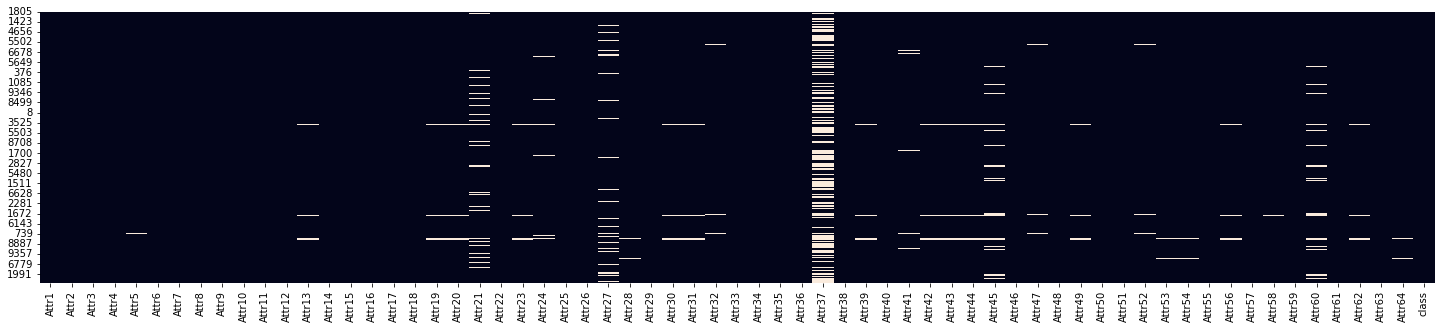

In [10]:
def sparsity_plot(df1_train):
    fig,ax = plt.subplots(figsize=(25,5))
    sns.heatmap(df1_train.isnull(),cbar=False,ax=ax)
    
sparsity_plot(df_train)

In [11]:
df_train.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,8402.000000,8402.000000,8402.000000,8389.000000,8.383000e+03,8402.000000,8402.000000,8392.000000,8399.00000,8402.000000,8402.000000,8389.000000,8367.000000,8402.000000,8.395000e+03,8392.000000,8392.000000,8402.000000,8367.000000,8367.000000,7744.000000,8402.000000,8367.000000,8211.000000,8402.000000,8392.000000,7.838000e+03,8225.000000,8402.000000,8367.000000,8367.000000,8.321000e+03,8389.000000,8392.000000,8402.000000,8402.000000,4631.000000,8402.000000,8367.000000,8389.000000,8241.000000,8367.000000,8367.000000,8367.000000,7927.000000,8389.000000,8.335000e+03,8402.000000,8367.000000,8392.000000,8402.000000,8334.000000,8225.000000,8225.000000,8.402000e+03,8367.000000,8402.000000,8379.000000,8402.000000,7.926000e+03,8388.000000,8367.000000,8389.000000,8225.000000,8402.000000
mean,0.054847,0.588978,0.129347,11.308973,-1.764028e+03,-0.087670,0.067418,16.054715,1.82838,0.397535,0.088962,1.935428,0.419023,0.067431,3.204069e+03,2.103678,17.500934,0.073812,-0.248363,62.258834,5.557531,0.077978,-0.253424,0.219876,0.228901,1.939756,1.143300e+03,6.629665,3.919917,0.805050,-0.236592,1.388640e+03,8.256637,5.483663,0.074246,1.983730,83.018356,0.500004,-0.132608,2.439891,35.723698,-0.200886,194.601331,132.342340,23.553849,10.289031,6.495088e+02,0.006799,-0.279191,9.940061,0.462176,13.853875,6.080295,7.247296,6.288117e+03,-0.029447,0.032885,3.414699,1.660515,6.390950e+02,14.266036,277.043245,9.061467,38.013129,0.047132
std,0.705906,4.913137,4.905252,585.295212,1.323300e+05,5.471911,0.709017,675.340779,8.40540,4.915815,0.713999,83.890318,55.518390,0.709016,1.216060e+05,83.572191,680.675845,0.919193,12.428827,682.431099,342.266905,0.635466,12.360156,2.229882,5.181163,81.199225,3.409121e+04,104.095424,0.835511,22.895986,12.426631,7.644385e+04,26.928841,76.378792,0.622324,2.741026,1875.706821,4.910074,8.438313,41.306442,3181.085331,11.912042,3242.124557,2985.753437,1894.681438,585.172751,3.492582e+04,0.680207,13.151382,584.060903,4.902443,952.360451,98.684745,102.990880,5.722685e+04,5.936958,20.490525,198.503181,86.322725,4.137726e+04,89.235008,7255.146439,29.760936,460.467365,0.211933
min,-17.692000,0.000000,-445.880000,0.002238,-1.190300e+07,-486.720000,-17.692000,-2.081800,-1.21570,-445.860000,-17.692000,-274.570000,-631.710000,-17.692000,-2.321800e+06,-204.300000,-0.043411,-17.692000,-771.650000,-0.001439,-0.186360,-17.692000,-771.650000,-44.197000,-466.290000,-204.300000,-4.111900e+04,-690.400000,-0.358530,-495.410000,-771.390000,-9.295600e+03,-1.921900,-1696.000000,-17.073000,0.000000,-2.200900,-445.860000,-551.110000,-7.081900,-667.730000,-765.800000,-0.293730,0.000000,-74385.000000,-6.469200,-1.730300e+01,-17.692000,-905.750000,0.002238,0.000000,-25.467000,-869.040000,-706.490000,-7.513800e+05,-529.350000,-1667.300000,-198.690000,-172.070000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000691,0.255532,0.015534,1.036500,-5.222450e+01,0.000000,0.002069,0.432820,1.00920,0.297382,0.009406,0.006092,0.020880,0.002090,1.871650e+02,0.060353,1.449725,0.002090,0.001576,14.199500,0.794960,0.000000,0.000549,0.013231,0.132547,0.054367,0.000000e+00,0.024419,3.393875,0.073344,0.003841,4.458900e+01,2.759800,0.356747,0.001591,1.036925,1.028500,0.428815,0.001371,0.055519,0.022354,0.000000,65.432000,34.162500,0.005889,0.606840,1.488800e+01,-0.049980,-0.037668,0.748105,0.176005,0.122237,0.659500,0.950420,1.195200e+01,0.004887,0.007037,0.874940,0.000000,5.545975e+00,4.492450,40.635000,3.057300,1.997600,0.000000
50%,0.042716,0.463860,0.197595,1.606600,1.778200e+00,0.000000,0.050569,1.109750,1.192

# Data Imputation:-

In [17]:
def mean_imputation(df_train):
    imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
    mean_imputed_df = pd.DataFrame(imputer.fit_transform(df_train))
    mean_imputed_df.columns = df_train.columns
    return mean_imputed_df

mean_imputed_train = mean_imputation(df_train)
mean_imputed_test = mean_imputation(df_test)

In [18]:
mean_imputed_test.isnull().sum().sum()

0

# Handling Imbalanced dataset using SMOTE:-

In [20]:
def balanced_data(df):
    sm= SMOTE(random_state=42)
    y_train=df.iloc[:,-1]
    x_train=df.iloc[:,:-1]
    df1_train_res, y_train_res = sm.fit(x_train, y_train)
    return df1_train_res,y_train_res

In [21]:
df1['class'].value_counts()

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [22]:
def balanced_data(df):
    y_train=df.iloc[:,-1]
    x_train=df.iloc[:,:-1]
    sm = SMOTE(random_state = 2)
    df1_train_res, y_train_res = sm.fit_resample(x_train, y_train)
    return df1_train_res,y_train_res

In [24]:
train_balanced,y_balanced1=balanced_data(mean_imputed_train)
test_balanced,y_balanced2=balanced_data(mean_imputed_test) #There was no need to explicilty change the test data!

# Fitting a model:-

In [36]:
log_model = LogisticRegression(random_state=42,C=10, penalty='l1', solver='liblinear')

In [37]:
log_model.fit(train_balanced,y_balanced1)

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [38]:
log_predicted = log_model.predict(test_balanced)

In [41]:
print(f"The Accuracy Score of the Logistic Regression Model is : {accuracy_score(y_balanced2,log_predicted)}")

The Accuracy Score of the Logistic Regression Model is : 0.6905594405594405


In [43]:
precision_score(y_balanced2,log_predicted)

0.6760498384863867

In [44]:
recall_score(y_balanced2,log_predicted)

0.7317682317682318

In [46]:
f1_score(y_balanced2,log_predicted)

0.702806428400096

In [48]:
confusion_matrix(y_balanced2,log_predicted)

array([[1300,  702],
       [ 537, 1465]], dtype=int64)

Fitting a Random Forest Model:-

In [50]:
rand_model= RandomForestClassifier(random_state=42)

In [51]:
rand_model.fit(train_balanced,y_balanced1)

RandomForestClassifier(random_state=42)

In [52]:
rand_predictions= rand_model.predict(test_balanced)

In [53]:
accuracy_score(y_balanced2,rand_predictions)

0.7307692307692307

In [54]:
precision_score(y_balanced2,rand_predictions)

0.9704684317718941

In [55]:
recall_score(y_balanced2,rand_predictions)

0.476023976023976

In [57]:
confusion_matrix(y_balanced2,rand_predictions)

array([[1973,   29],
       [1049,  953]], dtype=int64)

In [59]:
svc_model= SVC(random_state=42)

In [60]:
svc_model.fit(train_balanced,y_balanced1)

SVC(random_state=42)

In [61]:
svc_predictions =svc_model.predict(test_balanced)

In [62]:
f1_score(y_balanced2,svc_predictions)

0.682988298829883

In [63]:
confusion_matrix(y_balanced2,svc_predictions)

array([[ 346, 1656],
       [ 105, 1897]], dtype=int64)

In [64]:
precision_score(y_balanced2,svc_predictions)

0.5339150014072614

In [65]:
recall_score(y_balanced2,svc_predictions)

0.9475524475524476

# Removing Highly correlated features:-

<AxesSubplot:>

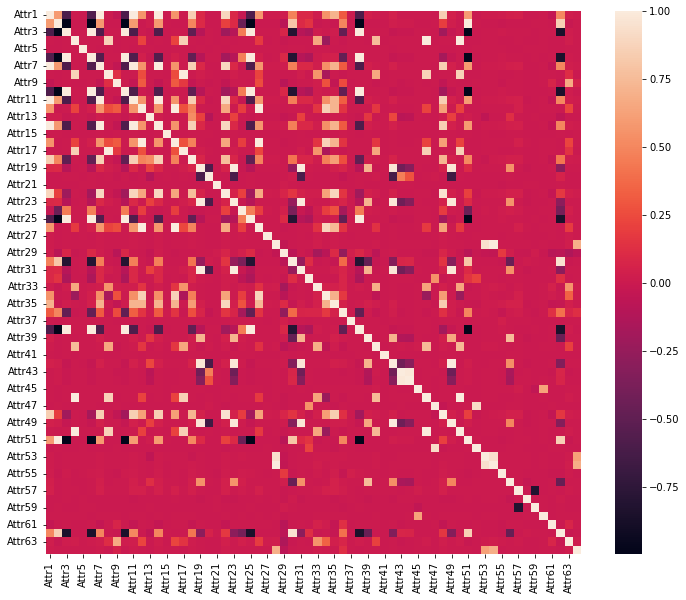

In [91]:
plt.figure(figsize=(12,10))
corr = train_balanced.corr()
sns.heatmap(corr)


In [66]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns) ):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [67]:
highly_corr_features=correlation(train_balanced,0.9)

In [68]:
len(highly_corr_features)

24

In [69]:
x_train= train_balanced.drop(highly_corr_features,axis=1)

In [70]:
x_test = test_balanced.drop(highly_corr_features,axis=1)

In [72]:
log_model.fit(x_train,y_balanced1) #Fitting the logistic regression model.

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [73]:
final_pred1=log_model.predict(x_test)

In [74]:
accuracy_score(y_balanced2,final_pred1)

0.7442557442557443

In [75]:
f1_score(y_balanced2,final_pred1)

0.706831119544592

In [76]:
precision_score(y_balanced2,final_pred1)

0.6729900632339657

In [77]:
recall_score(y_balanced2,final_pred1)

0.7442557442557443

In [80]:
rand_model.fit(x_train,y_balanced1)

RandomForestClassifier(random_state=42)

In [82]:
final_pred2= rand_model.predict(x_test)

In [83]:
f1_score(y_balanced2,final_pred2)

0.6768332251784556

In [84]:
recall_score(y_balanced2,final_pred2)

0.5209790209790209

In [85]:
precision_score(y_balanced2,final_pred2)

0.9657407407407408

In [86]:
svc_model.fit(x_train,y_balanced1)

SVC(random_state=42)

In [87]:
final_pred3 = svc_model.predict(x_test)

In [88]:
recall_score(y_balanced2,final_pred3)

0.9485514485514486

In [89]:
precision_score(y_balanced2,final_pred3)

0.5334269662921348